In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

![picture](https://drive.google.com/uc?id=1P2QdWVUlnJWaIOLJsMIroeyjnwZyT5HX)



In [ ]:
#Function to read data on given path into a dataframe
def read_data(file_path):
  data = pd.read_csv(file_path, sep='\t', header=None)
  #Make list of empty columns
  empty_cols = [col for col in data.columns if data[col].isnull().all()]
  # Drop these columns from the dataframe
  data.drop(empty_cols, axis=1, inplace=True) 
  #Return dataframe
  return data

![picture](https://drive.google.com/uc?id=1qLnqhB8ZupNldoFdwzWIpw5eVT0lBcHQ)




In [ ]:
#Function to calculate distance between 2 numpy arrays
def distance(v1,v2):
  dis = np.sqrt(np.sum((v1-v2)**2))
  return dis


![picture](https://drive.google.com/uc?id=1jUOHoGgzaKvvt1kyG-5ruxWqKldzIHgQ)





In [ ]:
#Function to randomly initialise centers from the dataframe
def centers_initialise(data, n_clusters):
  index = []
  for i in range(n_clusters):
    index.append(i)
  ini_centers = data.sample(n_clusters)
  ini_centers.index = index
  return ini_centers

In [ ]:
def update_centers(data, predictions, centers):
  n_clusters = len(centers)
  for i in range(n_clusters):
    index = np.where(predictions==i)
    centers.iloc[i] = data.iloc[index].mean()
  return centers

In [ ]:
def assign_points(centers, data, predictions):
  n_clusters = len(centers)
  for i in range(len(data)):
    dis = distance(data.iloc[i], centers[0])
    predictions[i] = 0
    for j in range(1,n_clusters,1):
      if(distance(data.iloc[i], centers[j]) < dis):
        dis = distance(data.iloc[i], centers[j])
        predictions[i] = j
  return predictions


In [ ]:
def cost_kmeans(data, centers, predictions):
  cost = 0
  for i in range(len(data)):
    cost = cost + distance(data.iloc[i], centers[predictions[i]])
  cost = cost/len(data)
  return cost

In [ ]:
def kmeans(data, n_clusters):
  ini_centers = centers_initialise(data, n_clusters)
  predictions = np.zeros(len(data))
  predictions = assign_points(ini_centers, data, predictions)
  centers = update_centers(data, predictions, ini_centers)
  cost = cost_kmeans(data, centers, predictions)
  iter = 1
  cost_prev = 0
  while(abs(cost-cost_prev)>0.0001 and iter<1000):
    cost_prev = cost
    predictions = assign_points(centers, data, predictions)
    centers = update_centers(data, predictions, centers)
    cost = cost_kmeans(data, centers, predictions)
    iter = iter + 1
  return centers, predictions


Accuracy using kmeans is :  0.9745


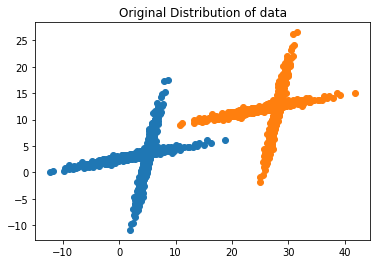

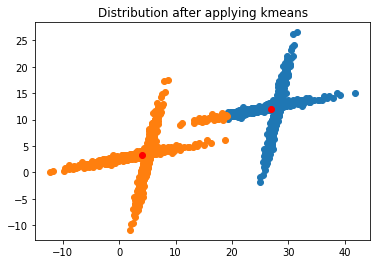

In [ ]:
if __name__ == '__main__':
  df1 = read_data("Class1.txt")
  df2 = read_data("Class2.txt")
  plt.figure()
  plt.scatter(df1[[0]],df1[[1]],label="Class1")
  plt.scatter(df2[[0]],df2[[1]],label="Class2")
  plt.title("Original Distribution of data")

  df = pd.concat([df1,df2], ignore_index = True)
  centers, predictions = kmeans(df,2)

  plt.figure()
  plt.scatter(df.loc[np.where(predictions==0)][[0]], df.loc[np.where(predictions==0)][[1]])
  plt.scatter(df.loc[np.where(predictions==1)][[0]], df.loc[np.where(predictions==1)][[1]])
  plt.scatter(centers[[0]], centers[[1]], c="r")
  plt.title("Distribution after applying kmeans")
  
  corr_pred = 0
  for i in range(1000):
    if(predictions[i]==0):
      corr_pred = corr_pred+1
  for i in range(1000,2000,1):
    if(predictions[i]==1):
      corr_pred = corr_pred+1
  accuracy = corr_pred/2000
  print("Accuracy using kmeans is : ",max(accuracy, 1-accuracy))